# Hospital Analysis

# Loading the data

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data= pd.read_csv(r"C:\Users\amaan\Desktop\April Challenge Dataset .csv")
data.head()


,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Years),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
0,1,Lagos General,Lagos,Lagos City,Cardiology,ECG Machine,2,5000,MedTech Inc.,John Doe,1234567890,john@medtech.com,USA,2024-03-15,2024-04-10,2,1000,500,New
1,2,Abuja Hospital,Abuja,Abuja City,Radiology,MRI Machine,1,15000,Imagix,Jane Smith,9876543210,jane@imagix.co.uk,UK,2024-02-20,2024-03-18,3,2000,1000,New
2,3,Kano Medical,Kano,Kano City,Surgery,Surgical Tools,5,300,SurgiSupplies,Ahmed Hassan,2345678901,ahmed@surgisup.com,UAE,2024-01-10,2024-02-05,1,500,200,Used
3,4,Port Harcourt,Rivers,Port Harcourt,Pediatrics,Ventilator,3,10000,RespCare,Emily Johnson,3456789012,emily@respcare.cn,China,2024-04-02,2024-04-25,2,1500,800,Refurbished
4,5,Ibadan Clinic,Oyo,Ibadan City,Obstetrics,Ultrasound,1,8000,Sonoscan,Michael Chang,4567890123,michael@sonoscan.jp,Japan,2024-03-05,2024-03-28,2,1200,600,New


# Understanding the data

In [56]:
data.isnull().sum()

 Serial No                       0
 Hospital                        0
 State                           0
 Location                        0
 Department                      0
 Equipment                       0
 Quantity                        0
 Unit Price (USD)                0
 Supplier                        0
 Supplier Contact                0
 Supplier Phone                  0
 Supplier Email                  0
 Supplier Country                0
 Date Ordered                    0
 Date Delivered                  0
Warranty Period (Years)          0
 Maintenance Cost (USD/year)     0
 Installation Cost (USD)         0
 Equipment Condition             0
dtype: int64

Therefore, No Null values are present

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Serial No                     260 non-null    int64 
 1    Hospital                      260 non-null    object
 2    State                         260 non-null    object
 3    Location                      260 non-null    object
 4    Department                    260 non-null    object
 5    Equipment                     260 non-null    object
 6    Quantity                      260 non-null    int64 
 7    Unit Price (USD)              260 non-null    int64 
 8    Supplier                      260 non-null    object
 9    Supplier Contact              260 non-null    object
 10   Supplier Phone                260 non-null    int64 
 11   Supplier Email                260 non-null    object
 12   Supplier Country              260 non-null    object
 13   Date

# Check for duplicate rows

In [58]:
df = pd.DataFrame(data)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


To drop the duplicate rows

In [60]:
df.drop_duplicates(inplace=True)
duplicate_count = df.duplicated().sum
print(duplicate_count)



<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
255    False
256    False
257    False
258    False
259    False
Length: 260, dtype: bool>


# Summary

In [61]:
df = pd.DataFrame(data)
df.columns = df.columns.str.strip()
df.drop(['Supplier Phone', 'Serial No'], axis=1, inplace=True)
summary=df.describe().round(2)
summary = summary.rename(index={
    'mean': 'Average value',
    'std': 'Standard Deviation',
    'min': 'Minimum value',
    'max': 'Maximum value'})
summary = summary.drop(['count','25%','50%','75%'])
summary

,Quantity,Unit Price (USD),Warranty Period (Years),Maintenance Cost (USD/year),Installation Cost (USD)
Average value,2.35,37405.00,3.00,1779.23,1060.38
Standard Deviation,1.91,66113.52,0.91,1036.79,633.38
Minimum value,1.00,300.00,1.00,500.00,200.00
Maximum value,10.00,500000.00,5.00,5000.00,3000.00


# Handling unnecessary Columns

In [62]:
df.columns = df.columns.str.strip()
df.drop([ 'Supplier Email', 'Supplier Contact'], axis=1, inplace=True)

# Top 20 Hospitals by Order Quantity

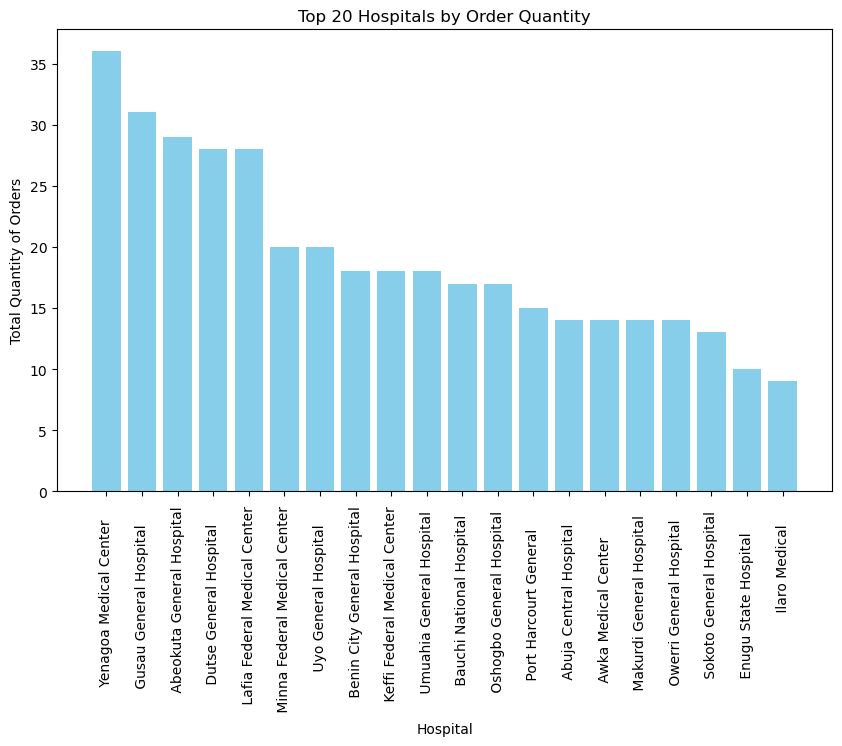

In [63]:

N = 20  
orders_per_hospital = df.groupby('Hospital')['Quantity'].sum().reset_index()
top_hospitals = orders_per_hospital.nlargest(N, 'Quantity')

plt.figure(figsize=(10, 6))
plt.bar(top_hospitals['Hospital'], top_hospitals['Quantity'], color='skyblue')
plt.xlabel('Hospital')
plt.ylabel('Total Quantity of Orders')
plt.title(f'Top {N} Hospitals by Order Quantity')
plt.xticks(rotation=90)
plt.show()


# Number of Hospitals per Country

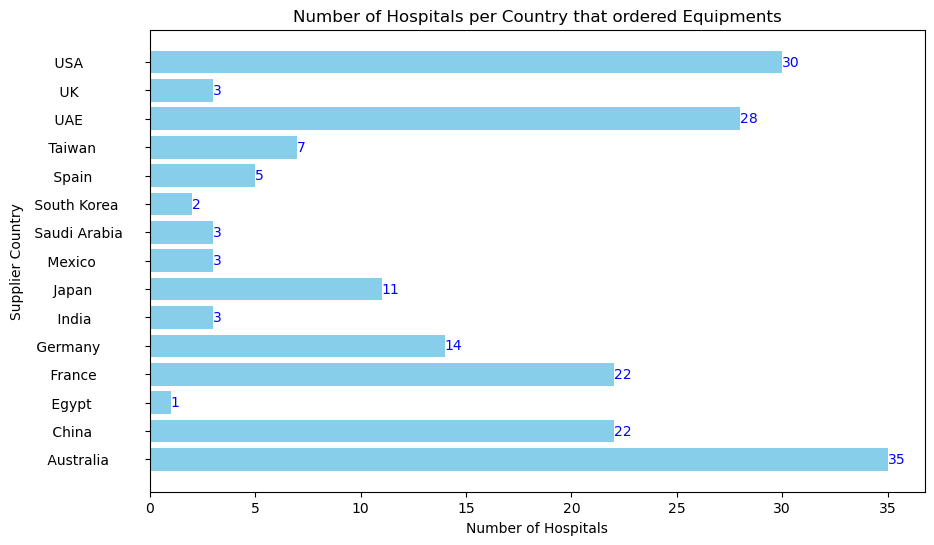

In [64]:
hospitals_per_country = df.groupby('Supplier Country')['Hospital'].nunique().reset_index()
hospitals_per_country.columns = ['Supplier Country', 'Number of Hospitals']


plt.figure(figsize=(10, 6))
bars = plt.barh(hospitals_per_country['Supplier Country'], hospitals_per_country['Number of Hospitals'], color='skyblue')
plt.xlabel('Number of Hospitals')
plt.ylabel('Supplier Country')
plt.title('Number of Hospitals per Country that ordered Equipments')


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', ha='left', va='center', color='blue')

plt.show()

# Unique Equipments in each Department

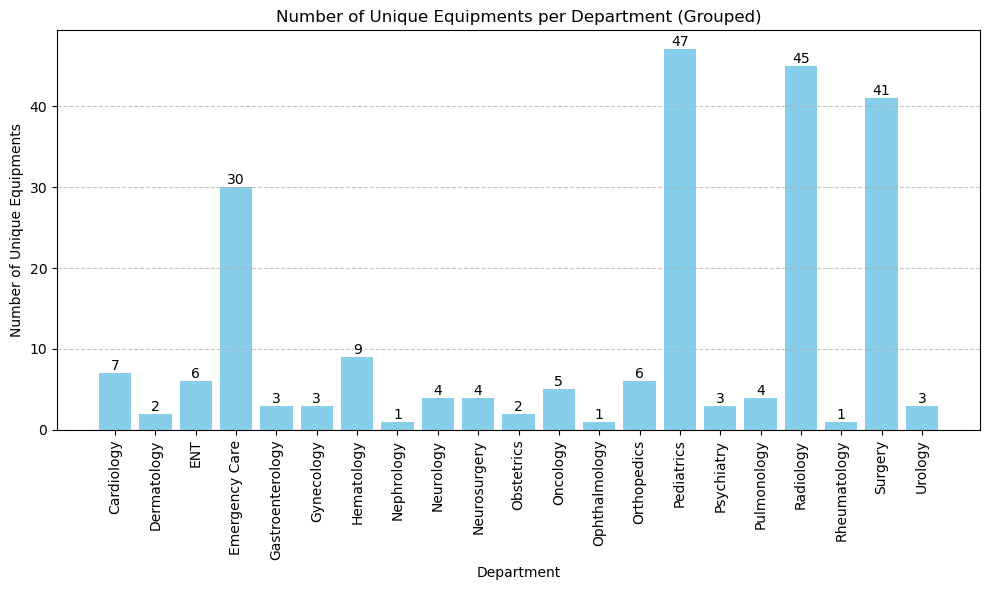

In [65]:

df['Department'] = df['Department'].str.strip()


unique_equipments_per_department = df.drop_duplicates(subset=['Hospital', 'Equipment']).groupby('Department').size().reset_index(name='Number of Unique Equipments')


plt.figure(figsize=(10, 6))
bars = plt.bar(unique_equipments_per_department['Department'], unique_equipments_per_department['Number of Unique Equipments'], color='skyblue')


for bar, qty in zip(bars, unique_equipments_per_department['Number of Unique Equipments']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{qty}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Department')
plt.ylabel('Number of Unique Equipments')
plt.title('Number of Unique Equipments per Department (Grouped)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribution of Hospitals per State 
States with >=2% Hospitals

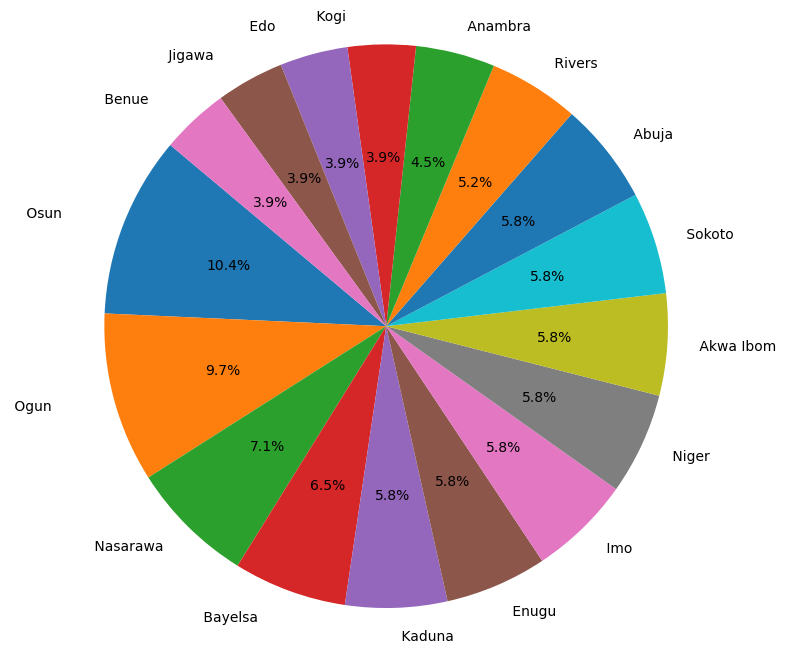

In [66]:
hospital_counts = df['State'].value_counts()


total_hospitals = hospital_counts.sum()
hospital_counts_filtered = hospital_counts[hospital_counts / total_hospitals >= 0.02]

plt.figure(figsize=(8, 8))
plt.pie(hospital_counts_filtered, labels=hospital_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Top 10 Costly Equipments

In [67]:

df['Unit Price (USD)'] = pd.to_numeric(df['Unit Price (USD)'], errors='coerce')
df['Equipment with Department']= df['Equipment'] + '(' + df['Department'] + ')'

equipment_prices = df.groupby('Equipment with Department')['Unit Price (USD)'].mean().reset_index()
top_10_equipment_prices = equipment_prices.sort_values(by='Unit Price (USD)', ascending=False).head(10)
top_10_equipment_prices



,Equipment with Department,Unit Price (USD)
58,MRI Machine (Radiology),500000.0
53,Linear Accelerator(Oncology),500000.0
57,MRI Machine (Neurosurgery),500000.0
75,Radiation Machine (Oncology),250000.0
12,CT Scanner (Radiology),200000.0
56,MRI Machine (Radiology),200000.0
76,Radiation Machine(Oncology),200000.0
11,CT Scanner (Radiology),80000.0
55,Lithotripter (Urology),75000.0
54,Lithotripsy Machine (Urology),70000.0


# Orders made by  Top Suppliers

C:\Users\amaan\AppData\Local\Temp\ipykernel_24996\3581506071.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(x='Supplier', y='index', size=10, data=supplier_counts, palette='viridis', orient='h')


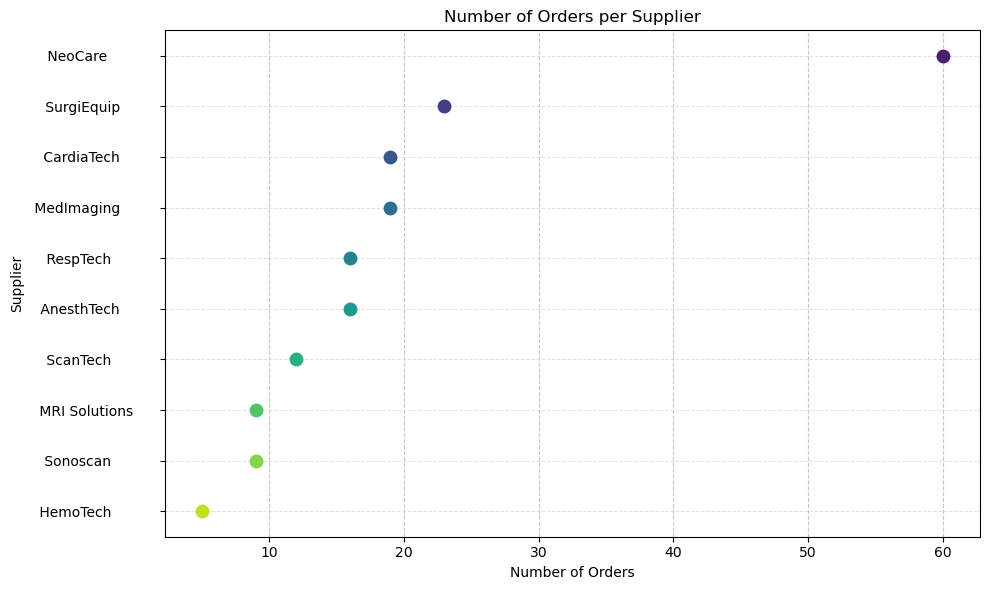

In [68]:

supplier_counts = df['Supplier'].value_counts().head(10)
supplier_counts = supplier_counts.reset_index()

plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Supplier', y='index', size=10, data=supplier_counts, palette='viridis', orient='h')

for i, count in enumerate(supplier_counts['Supplier']):
    ax.axhline(y=i, color='lightgrey', linestyle='--', linewidth=0.7, alpha=0.7)

plt.title('Number of Orders per Supplier')
plt.xlabel('Number of Orders')
plt.ylabel('Supplier')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Time taken to Deliver in each Department

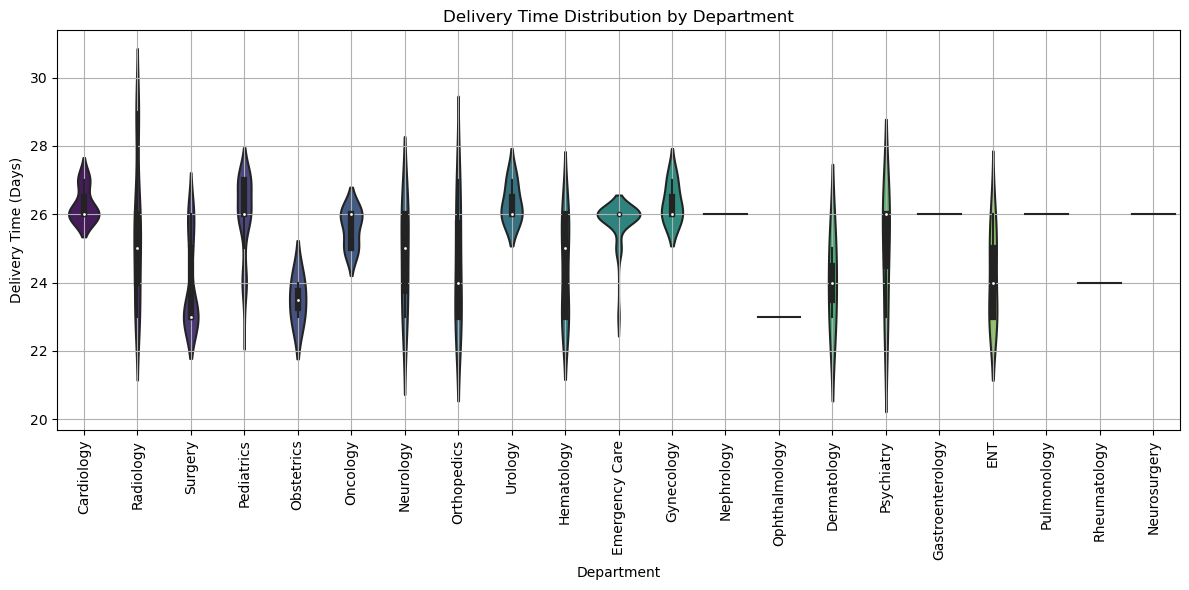

In [69]:

df['Date Ordered'] = pd.to_datetime(df['Date Ordered'])
df['Date Delivered'] = pd.to_datetime(df['Date Delivered'])

df['Delivery Time (Days)'] = (df['Date Delivered'] - df['Date Ordered']).dt.days

df['Department'] = df['Department'].str.strip()
plt.figure(figsize=(12, 6))
sns.violinplot(x='Department', y='Delivery Time (Days)', data=df, palette='viridis')
plt.title('Delivery Time Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Delivery Time (Days)')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Average Waranty Period per Department

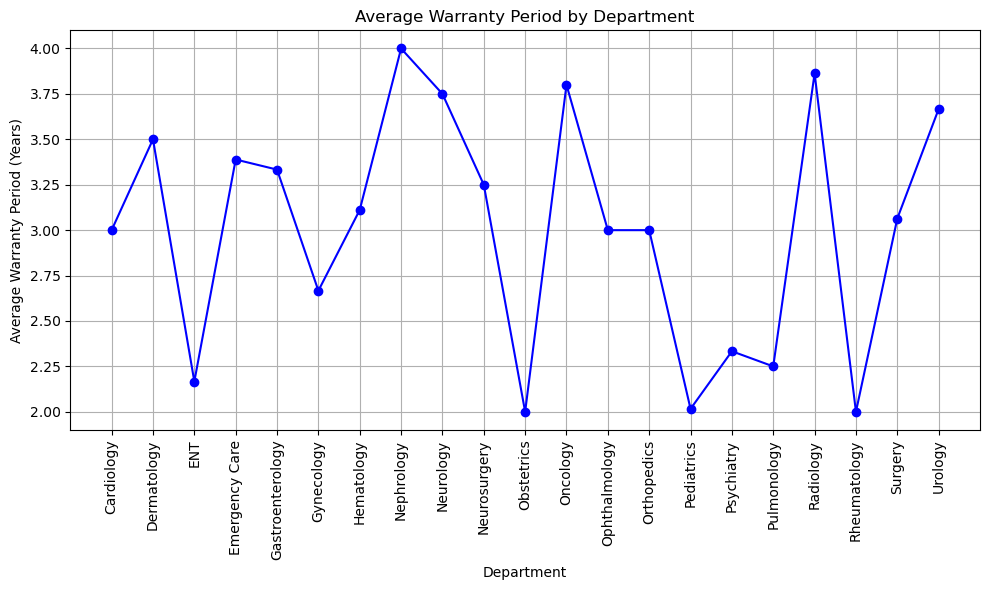

In [70]:



df['Department'] = df['Department'].str.strip()

avg_warranty = df.groupby('Department')['Warranty Period (Years)'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_warranty['Department'], avg_warranty['Warranty Period (Years)'], marker='o', linestyle='-', color='b')

plt.title('Average Warranty Period by Department')
plt.xlabel('Department')
plt.ylabel('Average Warranty Period (Years)')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Average Insallation cost per Department

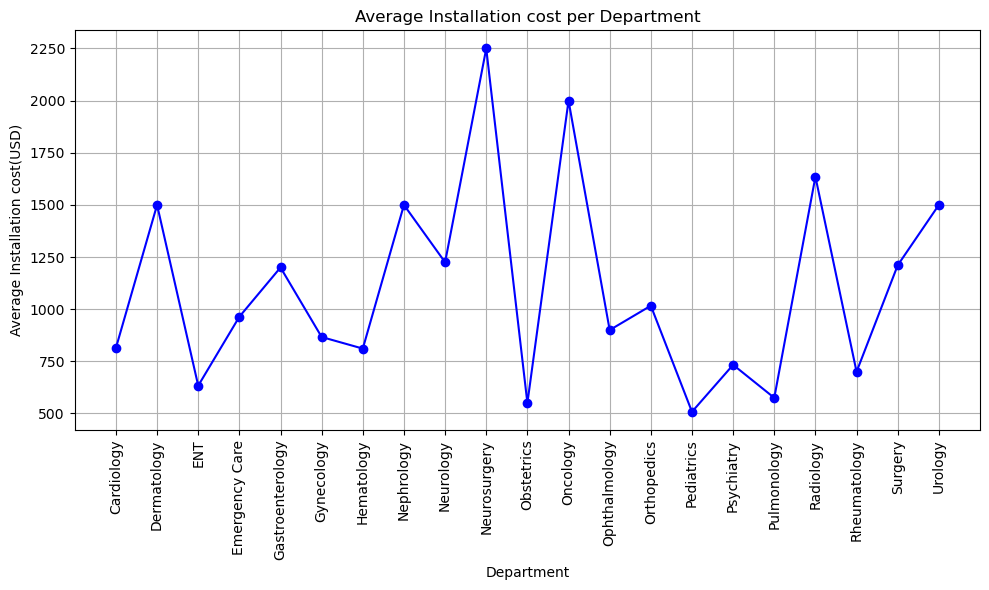

In [71]:

df['Department'] = df['Department'].str.strip()

avg_maintenance = df.groupby('Department')['Installation Cost (USD)'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_maintenance['Department'], avg_maintenance['Installation Cost (USD)'], marker='o', linestyle='-', color='b')

plt.title('Average Installation cost per Department')
plt.xlabel('Department')
plt.ylabel('Average Installation cost(USD)')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Average Maintenance cost per Department

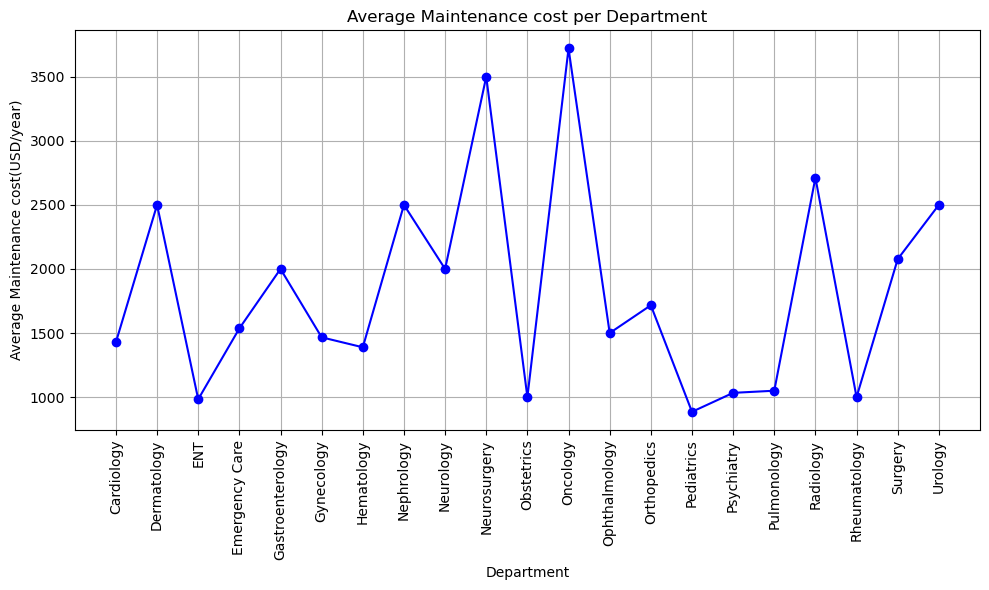

In [72]:

df['Department'] = df['Department'].str.strip()

avg_maintenance = df.groupby('Department')['Maintenance Cost (USD/year)'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(avg_maintenance['Department'], avg_maintenance['Maintenance Cost (USD/year)'], marker='o', linestyle='-', color='b')

plt.title('Average Maintenance cost per Department')
plt.xlabel('Department')
plt.ylabel('Average Maintenance cost(USD/year)')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution of Equipment

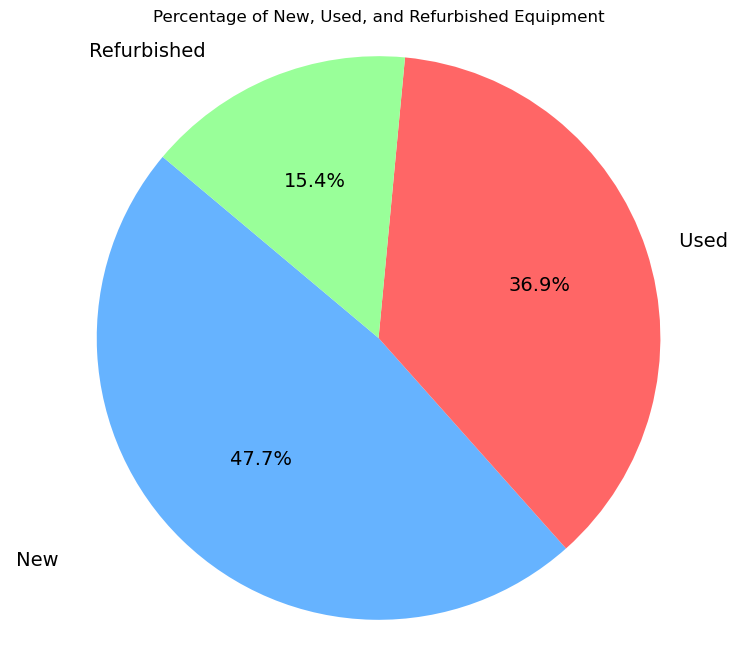

In [73]:

equipment_condition_counts = df['Equipment Condition'].value_counts()

colors = ['#66b3ff', '#ff6666', '#99ff99']  # Bright Blue, Bright Red, Bright Green

plt.figure(figsize=(8, 8))
plt.pie(equipment_condition_counts, labels=equipment_condition_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color':"Black",'fontsize':14})
plt.title('Percentage of New, Used, and Refurbished Equipment')
plt.axis('equal') 
plt.show()

In [75]:
df.head()

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,...,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Years),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition,Equipment with Department,Delivery Time (Days)
0,1,Lagos General,Lagos,Lagos City,Cardiology,ECG Machine,2,5000,MedTech Inc.,John Doe,...,john@medtech.com,USA,2024-03-15,2024-04-10,2,1000,500,New,ECG Machine ( Cardiology ),26
1,2,Abuja Hospital,Abuja,Abuja City,Radiology,MRI Machine,1,15000,Imagix,Jane Smith,...,jane@imagix.co.uk,UK,2024-02-20,2024-03-18,3,2000,1000,New,MRI Machine ( Radiology ),27
2,3,Kano Medical,Kano,Kano City,Surgery,Surgical Tools,5,300,SurgiSupplies,Ahmed Hassan,...,ahmed@surgisup.com,UAE,2024-01-10,2024-02-05,1,500,200,Used,Surgical Tools( Surgery ),26
3,4,Port Harcourt,Rivers,Port Harcourt,Pediatrics,Ventilator,3,10000,RespCare,Emily Johnson,...,emily@respcare.cn,China,2024-04-02,2024-04-25,2,1500,800,Refurbished,Ventilator ( Pediatrics ),23
4,5,Ibadan Clinic,Oyo,Ibadan City,Obstetrics,Ultrasound,1,8000,Sonoscan,Michael Chang,...,michael@sonoscan.jp,Japan,2024-03-05,2024-03-28,2,1200,600,New,Ultrasound ( Obstetrics ),23
